# Chapter 10

## Question 11

The final question! Run hierarchical clustering on gene expression data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy
import sklearn.metrics
import sklearn.preprocessing
import sklearn.decomposition


### (a) Load the CSV data 

In [2]:
df = pd.read_csv("Ch10Ex11.csv", header=None).T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


### (b) Apply hierarchical clustering to the samples using correlation- based distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

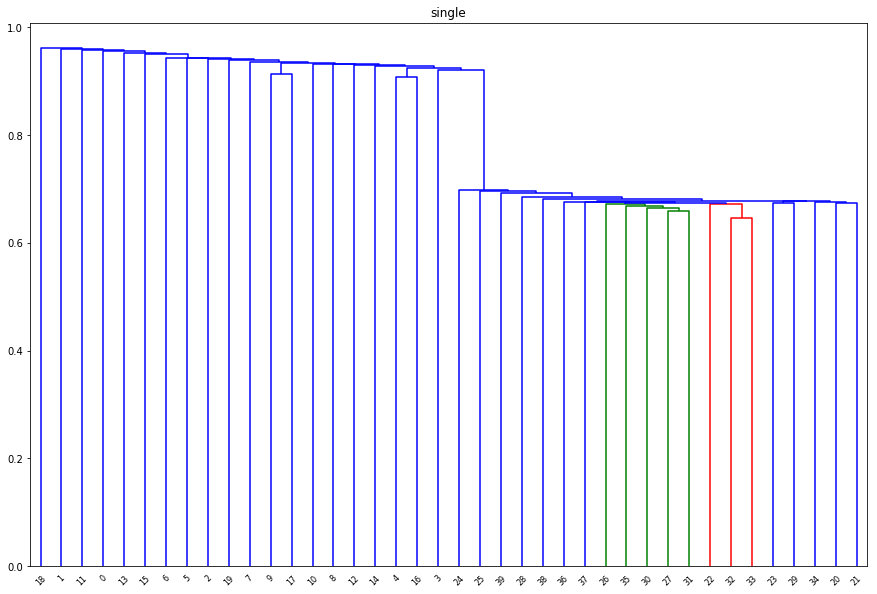

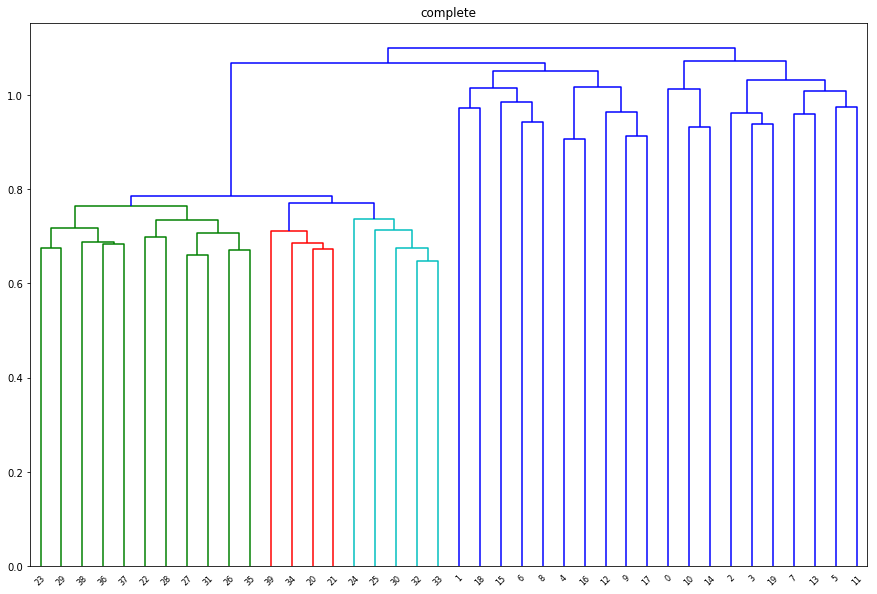

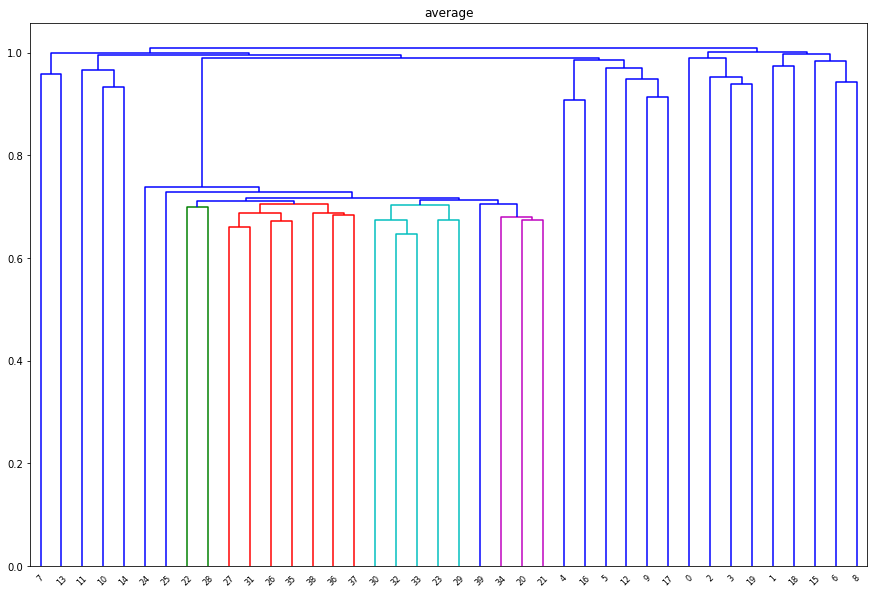

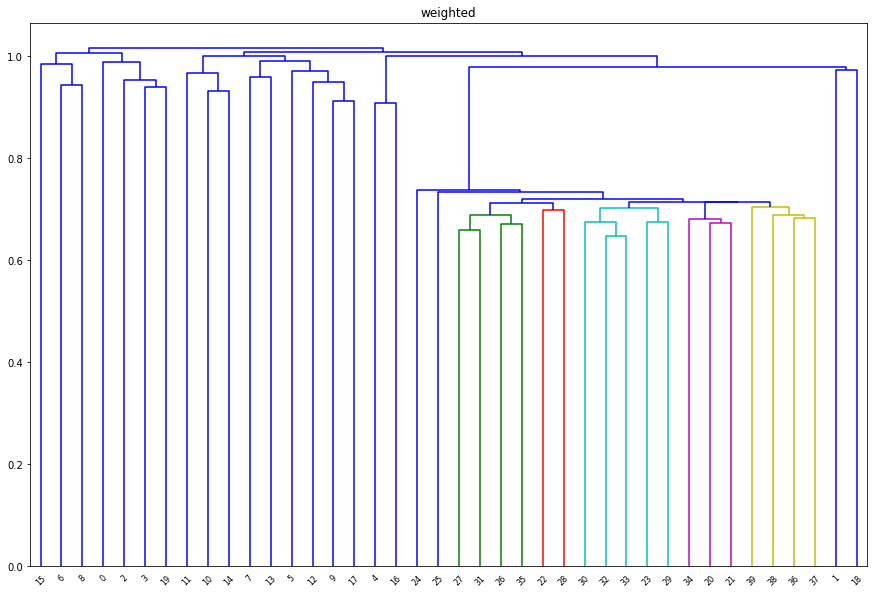

In [3]:
for method in "single complete average weighted".split():
    Z = scipy.cluster.hierarchy.linkage(df, method=method, metric="correlation")
    fig, ax = plt.subplots(figsize=(15,10))
    dendro = scipy.cluster.hierarchy.dendrogram(Z, ax=ax)
    ax.set_title(method)
    plt.show()


In [4]:
# Complete seems to give the most balanced dendrogram
Z = scipy.cluster.hierarchy.linkage(df, method="complete", metric="correlation")
predicted_classes = scipy.cluster.hierarchy.cut_tree(Z, n_clusters=4).ravel()
true_classes = np.asarray([0]*20 + [1]*20)
print(sklearn.metrics.confusion_matrix(predicted_classes, true_classes))

[[ 3  0  0  0]
 [10  0  0  0]
 [ 7  0  0  0]
 [ 0 20  0  0]]


The second group (diseased) seem to cluster together, whilst the healthy samples all seem different. Lets try scaling the data:


[[20  0]
 [ 0 20]]


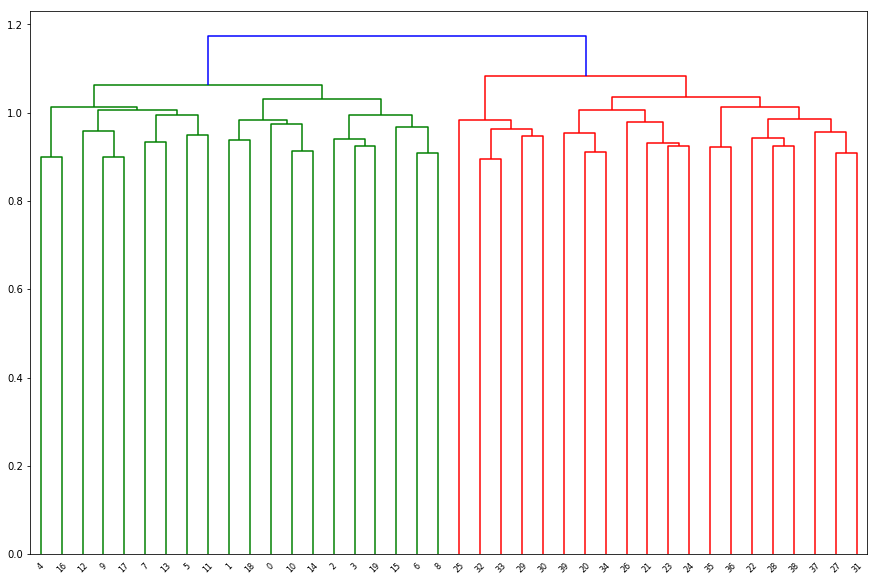

In [5]:
Z = scipy.cluster.hierarchy.linkage(sklearn.preprocessing.StandardScaler(with_mean=True).fit_transform(df),
                                    method="complete", metric="correlation")

fig, ax = plt.subplots(figsize=(15,10))
dendro = scipy.cluster.hierarchy.dendrogram(Z, ax=ax, color_threshold=1.1)
predicted_classes = scipy.cluster.hierarchy.cut_tree(Z, n_clusters=2).ravel()
true_classes = np.asarray([0]*20 + [1]*20)
print(sklearn.metrics.confusion_matrix(predicted_classes, true_classes))


### (c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

We could try PCA?


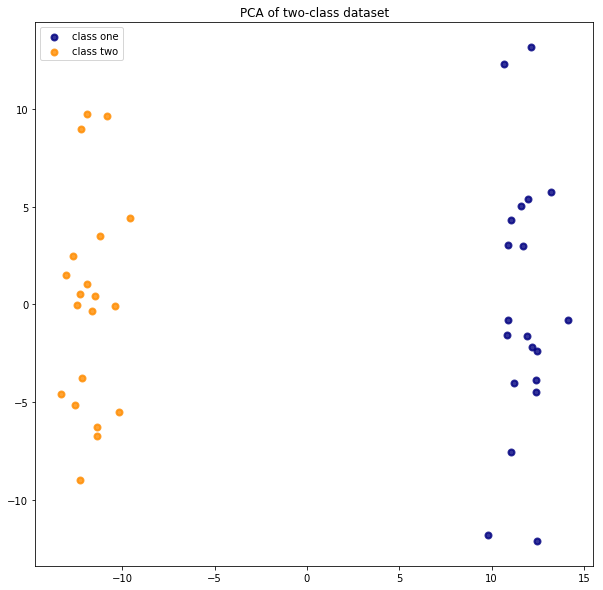

In [6]:
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(df)
projected_dataset = pca.transform(df)
y = np.asarray([0]*20 + [1]*20)

colors = ['navy','darkorange']
lw = 2
target_names = ["class one", "class two"]

fig, ax = plt.subplots(figsize=(10,10))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(projected_dataset[y == i, 0], projected_dataset[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of two-class dataset')
plt.show()

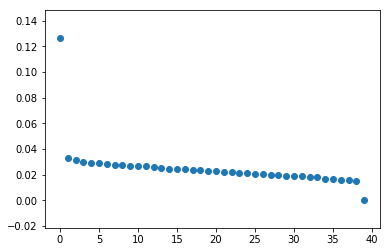

In [7]:
pca = sklearn.decomposition.PCA()
pca.fit(df)
plt.scatter(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)


First component is pretty informative - what combination of the genes is it formed of?

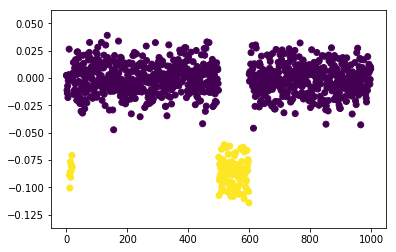

In [8]:
first_component = pca.components_[0]
colors = [abs(x) > 0.05 for x in first_component]
plt.scatter(range(len(first_component)), first_component, c=colors)


In [9]:
print(np.where(colors))

(array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19, 500, 501, 502,
       503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515,
       516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528,
       529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541,
       542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554,
       555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567,
       568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580,
       581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593,
       594, 595, 596, 597, 598, 599]),)


 We could also do a t-test?

In [13]:
import sklearn.feature_selection 


kbest = sklearn.feature_selection.SelectKBest(k=50).fit(df, y)

print(np.where(kbest.get_support()))

(array([ 10,  12,  14,  15, 501, 502, 504, 507, 508, 510, 512, 513, 515,
       519, 521, 522, 527, 529, 534, 535, 537, 538, 539, 540, 547, 548,
       550, 553, 554, 557, 558, 560, 561, 562, 563, 564, 565, 567, 568,
       569, 573, 574, 583, 587, 588, 589, 591, 592, 598, 599]),)
